# Metody statystyczne zestaw 4
## Autor Paweł Jelonek

In [121]:
import numpy as np
import matplotlib.pyplot as plt
# import concurrent.futures
# import threading
# import time
import random
from enum import Enum

# from timeit import default_timer as timer
plt.rcParams['figure.figsize']=(20, 10)
plt.rcParams['axes.titlesize']=20

### Symulacja gry kośćmi

- Kostki: czarna i czerwona
- Prawdopodobieństwo wygrania w grze: $\Large P_{wygr}=\frac{\Sigma (Z > C_{z})}{\Sigma all cases}$ 
- Wartość oczekiwania

In [3]:
class Player:
    
    def __init__(self, funds_amount: int):
        self.funds_amount = funds_amount
        
    def lost_game(self, bet) -> None:
        self.funds_amount -= bet
    
    def won_game(self, bet) -> None:
        self.funds_amount += bet
        
    def __str__(self):
        return f'Player has {self.funds_amount} funds'
    
    def __repr__(self):
        return str(self.__dict__)

In [171]:
def roll_dice() -> int:
    return int(np.random.uniform(1, 7))

In [165]:
def extract_game_data(data: list) -> list:
    prob_win_data = []
    wins = 0
    games = 0
    for game in data:
        games += 1
        if game: wins += 1
        prob_win_data.append((wins/games))
    return prob_win_data

In [ ]:
def dice_game_without_bets(n: int = None) -> list:
    game_history = []
    for i in np.arange(n):
        black_dice = roll_dice()
        red_dice = roll_dice()
        player_win_condition = black_dice < red_dice
        game_history.append(player_win_condition)
    return game_history        

Problem A
- Symulacja $N = 10^6$ rzutów dwoma kostkami
- Porównać experymentalną wartość prawdopodobieństwa wygrania w jednej grze z teoretyczną $= 15/36$

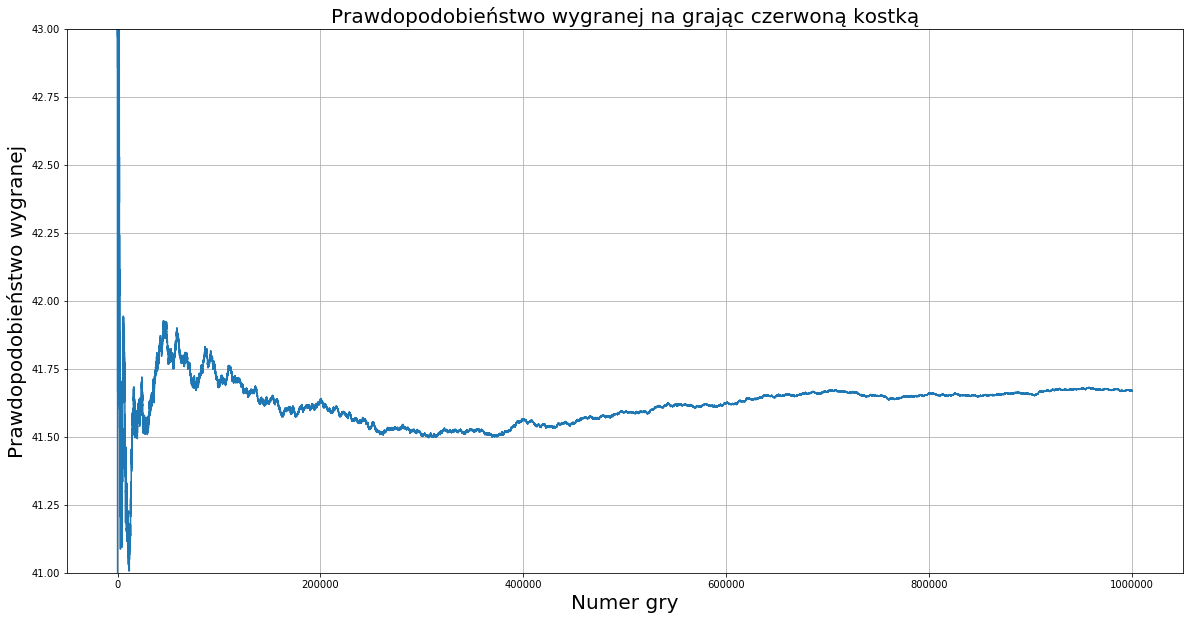

Eksperymentalna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi 0.41624907410495615
Teoretyczna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi 0.4166666666666667


In [176]:
N = 1000000

game_history = dice_game_without_bets(N)
ys = extract_game_data(game_history)
plt.ylim(41, 43)
plt.plot(np.arange(N), [game * 100 for game in ys])
plt.title('Prawdopodobieństwo wygranej na grając czerwoną kostką')
plt.xlabel('Numer gry', fontsize=20)
plt.ylabel('Prawdopodobieństwo wygranej', fontsize=20)
plt.grid()
plt.show()

print('Eksperymentalna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi', sum(ys)/N)
print('Teoretyczna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi', 15/36)

Problem B
- Symulacja $N = 10^6$ rzutów dwoma kostkami
- Porównać experymentalną wartość prawdopodobieństwa wygrania w jednej grze z teoretyczną $= 15/36$



In [ ]:
def dice_game(player: Player, bet: int, n: int = None) -> tuple:
    players_fund = []
    game_history = []
    games_played = 0
    while player.funds_amount > 0 and n > games_played:
        player_won_condition = np.random.uniform()
        player.won_game(bet) if player_won_condition else player.lost_game(bet)
        game_history.append(player_won_condition)
        players_fund.append(player.funds_amount)
    return game_history, players_fund
        